# Introduction
Portofolio management is one of the popular topic in the financial market industry. It helps investors to take advantage of the different opportunities observed in a set of assets while reducing the related risk. One of the question is how to select less correlated assets in such a way that the portfolio is less exposed to leverage effects. More specifically how can we identify correlated/noncorrelated assets while ensuring the minimal exposition of the capital.

The goal of this notebook is to shows how we can group assets in sub-categories while ensuring that we are less exposed. For this purpose, we will use the Kruskal's algorithm. We will use a set of 50 shares from yahoo finance.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import bs4 as bs
import pickle
import requests
import yfinance as yf
import  mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Download the list of tickers from wikipedia

In [2]:
# Download the list of tickers of the S&P 500 sothat we can use these tickers on our algorithm to test on any randomly selected portfolio
SITE = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

def sp500_tickerslist():
    req = requests.get(SITE)
    sp = bs.BeautifulSoup(req.text,"lxml")
    table = sp.find('table', {'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    
    #remove the "\n" character after scraping
    tickers = [s.replace('\n', '') for s in tickers]    
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers,f)
    
    # drop the empty values
    without_empty_strings = []
    for string in tickers:
        if (string != ''):
            without_empty_strings.append(string)
    print(without_empty_strings)
    
    
    return without_empty_strings
        

In [3]:
# Display the list of tickers
tickerlist = sp500_tickerslist()

tickerlist

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'T', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DH

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'T',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

In [4]:
len(tickerlist)

505

# Importing data

In [5]:
# Function to download the data from yahoo finance based on a randomly selected set of assets in the list of tickers
def download_stocks(asset_list,number_of_assets,start_date,end_date):
    df = pd.DataFrame()
    selected_assets = []
    selected_number = 0
    
    while (selected_number <= number_of_assets-1):
        stock = random.choice(asset_list)
        df[stock] = yf.download(stock, start_date, end_date)['Adj Close']
        if (df[stock].isna().any() == 1):
            df.dropna(inplace=True,axis=1)   
            asset_list.remove(stock)
        else:
            selected_number = df.shape[1]
    selected_asset = list(df.columns)
    return df, selected_assets   
                

In [6]:
# Define the the sample period we would like to work on
number_of_share = 10
start_date = dt.datetime(2012,1,1)
end_date = dt.datetime(2019,12,31)

df,selected_assets = download_stocks(tickerlist,number_of_share,start_date,end_date)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [7]:
# Check if we have the size required for the analysis (check the selected assets is N = 50 
df.shape


(2011, 10)

In [8]:
df.head(10)

,SIVB,NOV,TMUS,LEN,EVRG,EXPD,AMGN,SWK,PKG,MGM
Date,,,,,,,,,,
2012-01-03,48.84,56.18,15.27,18.93,21.08,36.85,52.69,58.93,19.82,10.50
2012-01-04,49.25,56.24,14.29,19.23,20.95,36.91,52.41,59.16,19.67,10.44
2012-01-05,51.59,56.09,13.03,19.77,21.02,36.58,52.94,59.39,19.86,10.52
2012-01-06,51.61,56.14,13.04,19.41,20.94,37.15,53.23,59.11,20.27,10.52
2012-01-09,53.37,56.72,13.34,19.68,21.02,37.21,52.77,59.37,20.53,10.70
2012-01-10,55.32,58.58,13.50,19.76,21.23,37.91,53.98,60.28,20.83,10.82
2012-01-11,55.09,58.38,13.71,21.17,21.25,37.90,54.58,60.19,20.91,11.31
2012-01-12,55.26,58.11,13.92,21.11,21.19,37.99,55.51,60.92,20.83,11.47
2012-01-13,53.90,57.96,13.58,20.95,21.09,38.07,55.56,60.07,20.57,11.68


In [9]:
df1 = df.copy()

# Correlations and distances calculation function

In [10]:
# Function to transform the dataframe into a linearized form, calculate the log-returns 
#and calculate the correlation and distance matrix

def correlation_and_distance(data):
    # Log-linearize the price data 
    data = np.log(data)

    # Calculate the returns for each asset in the portfolio

    data = data - data.shift(1)
    
    # drop nan values

    df1.dropna(inplace=True)
    
    # Calculate the correlation matrix of the assets in the portfolio
    corr_mat = data.corr()
    
    # calculate the distance matrix of the assets in the portfolio
    
    dist_mat = np.sqrt(2*(1-corr_mat))
    return data, corr_mat, dist_mat

In [11]:
df1, correlation_matrice, distance_matrice = correlation_and_distance(df1)

# Plot function of the correlation matrix

In [12]:
# Function to plot the correlation matrix
def plot_mat(corr_mat1):
    # Visualize the correlation matrix of the selected portfolio  
    sns.set(rc={'figure.figsize':(11,8)})
    sns.heatmap(corr_mat1, xticklabels=corr_mat1.columns, yticklabels=corr_mat1.columns).set_title('correlation matrix of assets')
    

In [13]:
# Visualize the correlation matrix

correlation_matrice

,SIVB,NOV,TMUS,LEN,EVRG,EXPD,AMGN,SWK,PKG,MGM
SIVB,1.000000,0.388909,0.252079,0.278614,0.075340,0.394382,0.359695,0.457583,0.400665,0.402470
NOV,0.388909,1.000000,0.193510,0.212016,0.058931,0.288252,0.221227,0.361162,0.313164,0.306798
TMUS,0.252079,0.193510,1.000000,0.216268,0.134603,0.223618,0.232492,0.229601,0.225432,0.283615
LEN,0.278614,0.212016,0.216268,1.000000,0.202523,0.280883,0.266560,0.388950,0.341269,0.340659
EVRG,0.075340,0.058931,0.134603,0.202523,1.000000,0.161522,0.221724,0.158466,0.200651,0.132600
EXPD,0.394382,0.288252,0.223618,0.280883,0.161522,1.000000,0.314417,0.455895,0.377617,0.370249
AMGN,0.359695,0.221227,0.232492,0.266560,0.221724,0.314417,1.000000,0.317604,0.353535,0.345658
SWK,0.457583,0.361162,0.229601,0.388950,0.158466,0.455895,0.317604,1.000000,0.417133,0.421445
PKG,0.400665,0.313164,0.225432,0.341269,0.200651,0.377617,0.353535,0.417133,1.000000,0.394094
MGM,0.402470,0.306798,0.283615,0.340659,0.132600,0.370249,0.345658,0.421445,0.394094,1.000000


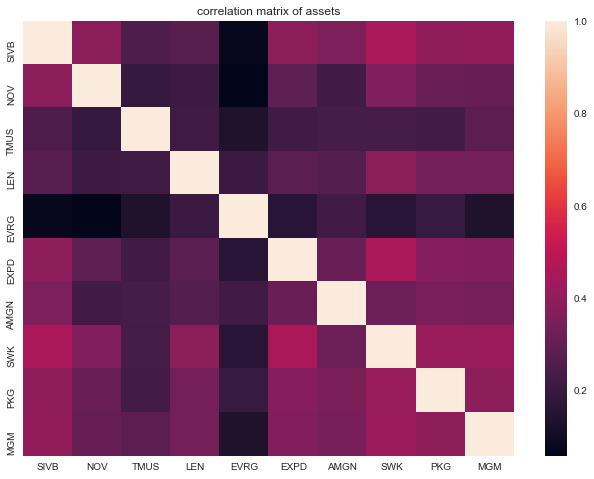

In [14]:
# plot the correlation matrix

plot_mat(correlation_matrice)

# Plot function of the distance matrix

In [15]:
def plot_dist(dist_mat1):
    # Visualize the distance matrix of the selected portfolio
    sns.set(rc={'figure.figsize':(11,8)})
    sns.heatmap(dist_mat1, xticklabels=dist_mat1.columns, yticklabels=dist_mat1.columns).set_title('distance matrix of assets')

In [16]:
# Visualize the distance matrix of assets

distance_matrice

,SIVB,NOV,TMUS,LEN,EVRG,EXPD,AMGN,SWK,PKG,MGM
SIVB,0.000000,1.105523,1.223046,1.201155,1.359897,1.100562,1.131640,1.041553,1.094838,1.093188
NOV,1.105523,0.000000,1.270032,1.255376,1.371911,1.193103,1.248017,1.130344,1.172038,1.177457
TMUS,1.223046,1.270032,0.000000,1.251984,1.315597,1.246099,1.238957,1.241289,1.244643,1.196983
LEN,1.201155,1.255376,1.251984,0.000000,1.262915,1.199264,1.211148,1.105486,1.147808,1.148339
EVRG,1.359897,1.371911,1.315597,1.262915,0.000000,1.294973,1.247618,1.297331,1.264396,1.317118
EXPD,1.100562,1.193103,1.246099,1.199264,1.294973,0.000000,1.170968,1.043173,1.115691,1.122275
AMGN,1.131640,1.248017,1.238957,1.211148,1.247618,1.170968,0.000000,1.168243,1.137071,1.143977
SWK,1.041553,1.130344,1.241289,1.105486,1.297331,1.043173,1.168243,0.000000,1.079691,1.075691
PKG,1.094838,1.172038,1.244643,1.147808,1.264396,1.115691,1.137071,1.079691,0.000000,1.100823
MGM,1.093188,1.177457,1.196983,1.148339,1.317118,1.122275,1.143977,1.075691,1.100823,0.000000


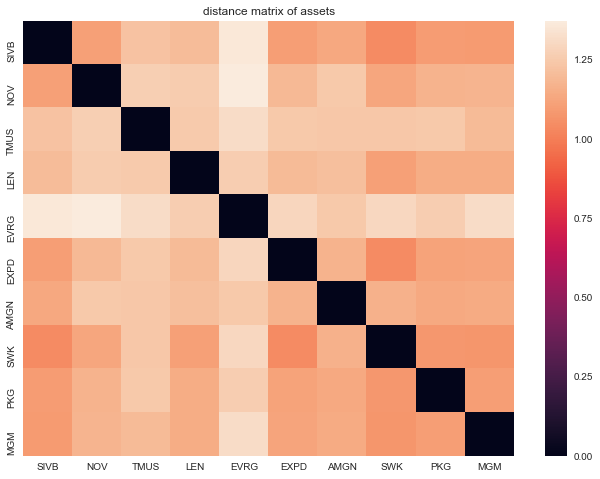

In [17]:
plot_dist(distance_matrice)

# Kruskal's Algorithm

In [20]:
# This algorithm identify the list of elements in a matrix A that are already connected to x
# The last column of the matrix contains values 1 if the value connected to x is already selected 
# and 0 if the value connected to x has not been selected. 
# The matrix A is of size (N by 3) 


def find_connected(A,x):
    connected_list=[]
    #identify the index where the value x already appears in A 
    aa1 = np.asarray(np.where((A==x)))
    #Identify the index row in A that are already selected (A[i,-1]==1)
    aa2 = np.where(A[aa1[0],2]==1,1,0)
    if np.sum(aa2)==0:                               #If there is no elements already connected to x in the matrix then return 
        connected_list=[]
    elif np.sum(aa2)>0: 
        for s in range(aa1.shape[1]):
            if (A[aa1[0,s],2]==1) and (aa1[1,s]==0):  # If there is an element in the matrix connected to x, then append it to the list of connected elements
                connected_list.append(A[aa1[1,s],1])
            elif (A[aa1[0,s],2]==1) and (aa1[1,s]==1): # This element can be in the first or in the second column of the matrix
                connected_list.append(A[aa1[1,s],0])
    return connected_list   
    

In [21]:
# This function verify if 2 lists have common elements. It will help to verify. 
# Basically in the main algorithm the process is to identify the list of elements 
# related to the new vertices that we check if those vertices should be considered them in the new graph


def common_element(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        return True 
    else: 
        return False

In [22]:
def BuildMST(distances):
    nb_of_node = distances.shape[0]
    edges_list = []
    graph_result = []
    
    # We start by constructing a new reshaped matrix containing the distance matrix elements. 
    # We use only the lower triangular part of the matrice "distance" as it is symetric. 
    # The first column of the new matrix report the distances, the second column reports the row index of the related distance 
    # and the third column report the column index of the related distance.
    
    # define the lower triangular matrix related to the symetric matrix "distance"
    
    dist_tril = np.tril(distances,k=-1)
    
    # reshape the matrix dist_tril into a column vector
    
    resh_dist = np.reshape(dist_tril, (nb_of_node*nb_of_node, 1))
    
    # Get the row index of the related values and reshape the matrix into a column vector
    
    row_idx = np.argsort(np.sort(dist_tril,axis=0),axis=0)
    
    resh_row_idx = np.reshape(row_idx, (nb_of_node*nb_of_node, 1))
    
    # Get the column index of the related values and reshape the matrix into a column vector
    
    col_idx = np.argsort(np.sort(dist_tril,axis=1),axis=1)
    
    resh_col_idx = np.reshape(col_idx, (nb_of_node*nb_of_node, 1))

    # Concatente the reshaped distance with their related row and column indexes and we obtain a new matrix with (n^2) rows and 3 columns
    
    reshaped_matrix = np.concatenate((resh_dist,resh_row_idx,resh_col_idx),axis=1)
    
    # Then we eliminate the rows for which the distance is zeros 
    
    mat_nonull = np.delete(reshaped_matrix,np.where(reshaped_matrix[:,0]==0),axis=0)
    
    # sort now the new matrix in ascending sense based on the distances values 
    # this is the new matrix that we will use to construct the new graph
    
    dist_sorted =  np.asarray(sorted(mat_nonull, key=lambda mat_nonull_entry: mat_nonull_entry[0]))

    # the number of rows of the new matrix "dist_sorted"
    
    N1 = dist_sorted.shape[0]
    
    G1 = np.concatenate((dist_sorted,np.zeros((N1, 1))),axis=1)
    
    G1 = np.asarray(G1)

    X = []
    Y = []
    
    i=0  
    G1[i,3]=1
    edges_list.append(G1[i,0])
    X.append(G1[i,1])
    Y.append(G1[i,2])
    graph_result.append(G1[i,:3])

    while (i<= N1-2):  #nb_of_node
        i=i+1 
        if ((G1[i,1] in X)==True) and ((G1[i,2] in Y)==False) or ((G1[i,1] in Y)==False) and ((G1[i,2] in X)==True):
            X_list = find_connected(G1[:i,1:4],G1[i,1])  # Find the list of values that are connected to the value G1[i,1]  in the submatrix with the lines lower to i and such that G1[i,4]==1
            Y_list = find_connected(G1[:i,1:4],G1[i,2])  # Find the list of values that are connected to tthe value G1[i,2] in the submatrix with the lines lower to i such that G1[i,4]
            if ((len(X_list) > 0) and (len(Y_list)==0)) or ((len(Y_list) > 0) and (len(X_list)==0)) or ((len(X_list) > 0) and (len(Y_list)>0) and (common_element(X_list,Y_list)==False)):
                G1[i,-1]=1
                edges_list.append(G1[i,0])
                X.append(G1[i,1])
                Y.append(G1[i,2])
                graph_result.append(G1[i,:3])
        
                #Now check if the list of elements connected to G1[i,1] and G1[i,2], (that are X1 and Y1) have common elements in connection.
                # If it is not the case then the edge [G1[i,0],G1[i,1],G1[i,2]] should be considered in the new graph   
    new_graph = np.asarray(graph_result)
    return new_graph, edges_list, dist_sorted




    # or ((G1[i,1] in Y)==False) and ((G1[i,2] in X)==True)

In [23]:
# Verify the results by displaying the resulted graph connected
GRAPH_result, edges_list, dist_sorted = BuildMST(distance_matrice)
GRAPH_result

array([[1.04155349, 7.        , 0.        ],
       [1.04317262, 7.        , 5.        ],
       [1.07569068, 9.        , 7.        ],
       [1.07969147, 8.        , 7.        ],
       [1.10548642, 7.        , 3.        ],
       [1.13034371, 7.        , 1.        ],
       [1.13707086, 8.        , 6.        ],
       [1.19698341, 9.        , 2.        ],
       [1.26439628, 8.        , 4.        ]])

In [24]:
edges_list

[1.0415534858577533,
 1.0431726157617736,
 1.0756906756195372,
 1.0796914688070296,
 1.105486415658337,
 1.130343710650314,
 1.137070862413182,
 1.1969834105374493,
 1.2643962773661128]

In [25]:
dist_sorted

array([[1.04155349, 7.        , 0.        ],
       [1.04317262, 7.        , 5.        ],
       [1.07569068, 9.        , 7.        ],
       [1.07969147, 8.        , 7.        ],
       [1.09318818, 9.        , 0.        ],
       [1.09483766, 8.        , 0.        ],
       [1.10056151, 5.        , 0.        ],
       [1.10082343, 9.        , 8.        ],
       [1.10548642, 7.        , 3.        ],
       [1.10552307, 1.        , 0.        ],
       [1.11569064, 8.        , 5.        ],
       [1.12227496, 9.        , 5.        ],
       [1.13034371, 7.        , 1.        ],
       [1.13164   , 6.        , 0.        ],
       [1.13707086, 8.        , 6.        ],
       [1.14397717, 9.        , 6.        ],
       [1.14780783, 8.        , 3.        ],
       [1.14833916, 9.        , 3.        ],
       [1.16824347, 7.        , 6.        ],
       [1.17096787, 6.        , 5.        ],
       [1.17203756, 8.        , 1.        ],
       [1.17745653, 9.        , 1.        ],
       [1.

# Conlusion
Thank you for your kind attention. We developed an algorithm to perform the Kruskal's algorithm. This algorithm can be used for stock categorization in the context of portfolio management.

We developed a selection algorithm to randomly select a set of stocks on yahoo finance. 

We developed alo an algorithm for the data treatment and calculation of the correlation and distance matrix between the stocks.


We end-up with the Kruskal algorithm for selection

One can test for any random portfolio of assets